# Beyond Excel: Notebooks, Pandas, and Python

Brenton Paulsen

Hack Salem

January 9, 2019

# Data Workflows

In our example (and in practice), analytics follows a similar cycle.

1. Gather Data
2. Shape Data
3. Analyze
4. Visualize and Share Results


Most of the time, most effort is spent in getting the data ready to analyze. Unfortunately, the valuable part of the cycle is where least time is spent.

**Our goal is to spend more time working with data and less time processing it**.

## What are the problems with spreadsheet tools?

### Issues in Practice
- Data limits: Excel limits to 1,048,576 rows and 15 digits of precision.
- Connection to live data: These tools are limited in ability to refresh from live sources.
- Programming: Spreadsheet formula are severly limited compared to general purpose programming languages.

### Issues in Process

- Reproducibility: Spreadsheets hide methodology. Where did the data come from? How was it processed?
- Context: There is no inherent place to explain context. What's the story behind this analysis? Who wanted it?

# Notebooks

Notebooks are interactive and visual REPLs (Read–eval–print loops).

The notebook itself is a document that combines narrative, code, and results.

- Narrative is usually formatted in Markdown or similar.

- Lines of codes are combined into _cells_.

- The output of code is HTML, or results that the notebook interprets as HTML.

There are several notebook tools: 
* [Jupyter](https://jupyter.org/index.html)
    * Azure Notebooks
    * AWS SageMaker Notebook
    * Google Colaboratory


* Wolfram Mathematica
* Apache Zeppelin
* Apache Spark

These notebook tools are usually web based.

# Jupyter

For this presentation, I'll be using the Jupyter Notebook with a Python kernel.

# Pandas 

In [1]:
import pandas as pd

First, we need to load in a dataset. Pandas supports a wide variety of data formats for read & write.

- CSV
- JSON
- HTML
- Local clipboard
- MS Excel
- HDF-Format
- Feather Format
- Parquet Format
- Msgpack
- Stata
- SAS
- Python Pickle Format
- SQL
- Google Big Query

I wanted to find something interesting, so I headed over to the Oregon Open Data Portal.

![Screenshot of Oregon Open Data Portal Home Page](OregonOpenData.PNG "Oregon Open Data Portal")

## Loading in Data

"Fertilizer violations and penalties" that will work for us!

In [2]:
df = pd.read_csv("Fertilizer_violations_and_penalties.csv", parse_dates=["Date"])
df.head(10)

,Party,Type,Counts,Prohibited act,Amount,Date
0,"Soil Works, LLC",Fertilizer notice of violation,1.0,ORS 633.366(1)(a),NaN,2018-06-24
1,"Land View, Inc.",Fertilizer notice of violation,7.0,ORS 633.366(1)(e),NaN,2018-06-21
2,"Land View, Inc.",Fertilizer notice of violation,4.0,ORS 633.366(1)(a),NaN,2018-06-21
3,"Faust Bio-Agricultural Service, Inc.",Fertilizer notice of violation,1.0,ORS 633.366(1)(a),NaN,2018-06-20
4,Bertels B.V.,Fertilizer notice of violation,1.0,ORS 633.366(1)(a),NaN,2018-05-25
5,Bertels B.V.,Fertilizer civil penalty,1.0,ORS 633.366(1)(c),$250,2018-05-25
6,"Easy Gardener Products, Inc.",Fertilizer notice of violation,1.0,ORS 633.366(1)(e),NaN,2018-05-24
7,"Easy Gardener Products, Inc.",Fertilizer civil penalty,2.0,ORS 633.366(1)(a),$250,2018-05-24
8,Sensational Solutions LLC,Fertilizer civil penalty,1.0,ORS 633.366(1)(a),$125,2018-05-23
9,Growth Products Ltd.,Fertilizer civil penalty,2.0,ORS 633.366(1)(e),$250,2018-05-23


Pandas reads in the data and does the work of identifying the data types for us (mostly).

In [3]:
df.dtypes

Party                     object
Type                      object
Counts                   float64
Prohibited act            object
Amount                    object
Date              datetime64[ns]
dtype: object

## Projection

We select which columns to present by passing a list of column names to the indexing operator of the data frame.

In [4]:
df[["Party", "Date"]].head(5)

,Party,Date
0,"Soil Works, LLC",2018-06-24
1,"Land View, Inc.",2018-06-21
2,"Land View, Inc.",2018-06-21
3,"Faust Bio-Agricultural Service, Inc.",2018-06-20
4,Bertels B.V.,2018-05-25


## Filtering

We select which rows to show by passing a condition to the indexing operator of the data frame.

In [5]:
df[df["Date"] > '2018-06-01']

,Party,Type,Counts,Prohibited act,Amount,Date
0,"Soil Works, LLC",Fertilizer notice of violation,1.0,ORS 633.366(1)(a),NaN,2018-06-24
1,"Land View, Inc.",Fertilizer notice of violation,7.0,ORS 633.366(1)(e),NaN,2018-06-21
2,"Land View, Inc.",Fertilizer notice of violation,4.0,ORS 633.366(1)(a),NaN,2018-06-21
3,"Faust Bio-Agricultural Service, Inc.",Fertilizer notice of violation,1.0,ORS 633.366(1)(a),NaN,2018-06-20


That condition is actually a vectorized function that returns a boolean for each record.

In [19]:
df["Date"] > '2018-06-01'

0       True
1       True
2       True
3       True
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
254    False
255    False
256    False
257    False
258    False
259    False
260    False
261    False
262    False
263    False
264    False
265    False
266    False
267    False
268    False
269    False
270    False
271    False
272    False
273    False
274    False
275    False
276    False
277    False
278    False
279    False
280    False
281    False
282    False
283    False
Name: Date, Length: 284, dtype: bool

## Sorting

In [6]:
df.sort_values(by="Counts", ascending=False).head(5)

,Party,Type,Counts,Prohibited act,Amount,Date
209,"Purely Organic Products, LLC",Fertilizer notice of violation,49.0,ORS 633.366(1)(e),NaN,2016-06-05
49,Wilbur-Ellis Company LLC,Fertilizer notice of violation,27.0,ORS 633.366(1)(e),NaN,2018-02-05
88,Sun Gro Horticulture Distribution Inc.,Fertilizer civil penalty,25.0,ORS 633.366(1)(e),"$62,500",2017-09-13
53,Wilbur-Ellis Company LLC,Fertilizer notice of violation,20.0,ORS 633.366(1)(a),NaN,2018-02-05
27,"Two Rivers Terminal, LLC",Fertilizer civil penalty,16.0,ORS 633.366(1)(a),"$6,000",2018-02-28


## Calculated Columns

In [8]:
df["Amount"] = df["Amount"].str.replace("$", "")
df["Amount"] = df["Amount"].str.replace(",", "")
df["Amount"] = pd.to_numeric(df["Amount"])

In [16]:
df.sort_values(by="Amount", ascending=False).head(5)

,Party,Type,Counts,Prohibited act,Amount,Date
88,Sun Gro Horticulture Distribution Inc.,Fertilizer civil penalty,25.0,ORS 633.366(1)(e),62500.0,2017-09-13
37,"Dr. Earth, Inc.",Fertilizer civil penalty,10.0,ORS 633.366(1)(a),25000.0,2018-02-18
140,J.R. Simplot Company,Fertilizer civil penalty,6.0,ORS 633.366(1)(a),11250.0,2017-02-17
117,Central Garden & Pet Company,Fertilizer civil penalty,4.0,ORS 633.366(1)(a),10000.0,2017-06-13
24,"Two Rivers Terminal, LLC",Fertilizer civil penalty,3.0,ORS 633.366(1)(e),7500.0,2018-02-28


## Grouping and Aggregation

In [10]:
tdf = df.groupby(pd.Grouper(key="Date", freq="MS"))[["Amount"]].sum()
tdf.tail(10)

,Amount
Date,
2017-09-01,66125.0
2017-10-01,0.0
2017-11-01,0.0
2017-12-01,0.0
2018-01-01,5500.0
2018-02-01,51750.0
2018-03-01,875.0
2018-04-01,375.0
2018-05-01,2375.0


## Plotting and Visualization

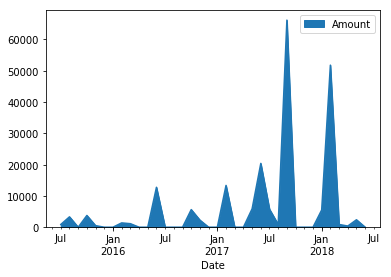

In [11]:
import matplotlib.pylab as plt

tdf.plot(kind='area')

That chart was kind of ugly though. It does take a little bit of effort to make something presentable.

Text(0, 0.5, 'Fines ($)')

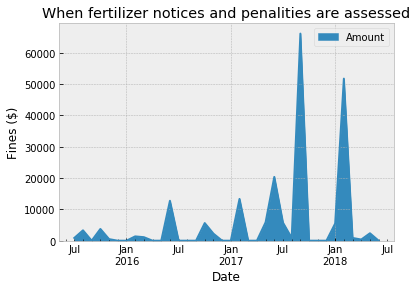

In [12]:
plt.style.use('bmh')
ax = tdf.plot(kind='area')

ax.set_title('When fertilizer notices and penalities are assessed')
ax.set_ylabel("Fines ($)")

I'll admit. Coding visuals seems a bit tedious and the defaults are less sensible than Excel, but it does let you get exactly what you want.

Text(0, 0.5, 'Fines ($)')

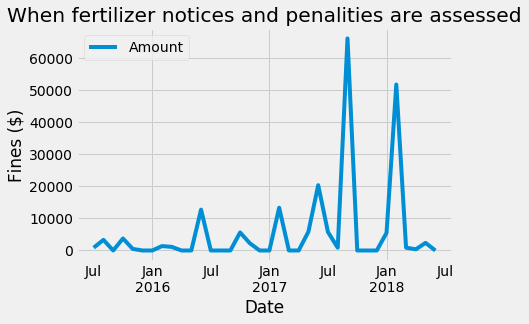

In [13]:
plt.style.use('fivethirtyeight')
ax = tdf.plot(kind='line')

ax.set_title('When fertilizer notices and penalities are assessed')
ax.set_ylabel("Fines ($)")

Text(0, 0.5, 'Fines ($)')

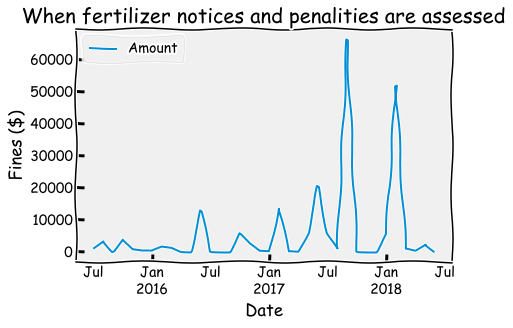

In [15]:
with plt.xkcd():
    ax = tdf.plot(kind='line')

ax.set_title('When fertilizer notices and penalities are assessed')
ax.set_ylabel("Fines ($)")

# The Future of Notebooks

Notebooks are not only changing the data analysis story, but also data science, and data engineering.

![Netflix Engineering Blog](Images/Netflix.png)

All tiers of data workers will be unified under one coding paradigm. 

The same way that machine learning models are produced is
* how models wil receive their training data
* and how their business value will be determined.